In [1]:
# Some imports we will need below
import numpy as np
from devito import *
import matplotlib.pyplot as plt 
from sympy.abc import a
from sympy import nsimplify

In [2]:
# define parameters 
nx = 100 
ny = 100 
nt = 200 
dx = 1
dy = 1

In [3]:
# Initialize u 
grid = Grid(shape=(nx, ny), extent=(100, 100))
u = TimeFunction(name = 'u', grid = grid, space_order = 2, save = 200)

c = Constant(name='c')
c2= Constant(name='c2')
pres = Constant(name='pres')

# iteration format of diffusion equation
eqn = Eq(u.dt, c * u.laplace + c2 * (pres - u))
stencil = Eq(u.forward, solve(eqn, u.forward))
print((stencil))

Eq(u(time + dt, x, y), dt*(c*(Derivative(u(time, x, y), (x, 2)) + Derivative(u(time, x, y), (y, 2))) + c2*(pres - u(time, x, y)) + u(time, x, y)/dt))


In [4]:
# create initial condition
x, y = grid.dimensions
t = grid.stepping_dim

init_matrix = np.ones((nx, ny), dtype=np.float64) * 100
init_matrix[nx//2, ny//2] = 0
u.data[0,:,:] = init_matrix
# create boundary condition
bc = [Eq(u[t+1, 0,    y],    u[t+1, 1,    y])]
bc+= [Eq(u[t+1, nx-1, y],    u[t+1, nx - 2, y])]
bc+= [Eq(u[t+1, x, ny-1],    u[t+1, x, ny - 2])]
bc+= [Eq(u[t+1, x,    0],    u[t+1, x,    1])]

# create force term
ft = [Eq(u[t+1,nx//2, ny//2], 0)]

In [5]:
op = Operator([stencil] + bc + ft)
stats = op.apply(dt=1e-1, c=1e-04, c2=1e-05, pres=100)

Operator `Kernel` ran in 0.01 s


/opt/anaconda/lib/python3.11/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/opt/anaconda/lib/python3.11/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


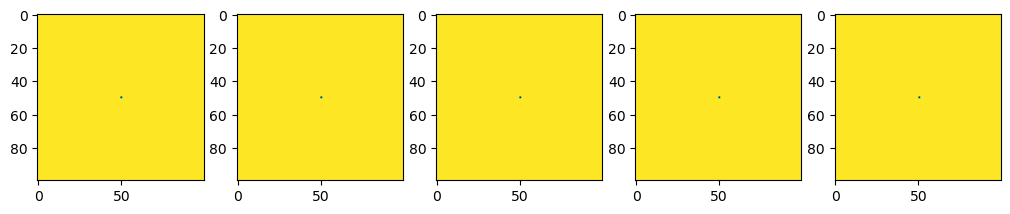

In [6]:
plt.figure(figsize=(15,40))
for i in range(1, 6):
    plt.subplot(1, 6, i)
    plt.imshow(u.data[(i-1)*40])
plt.show()

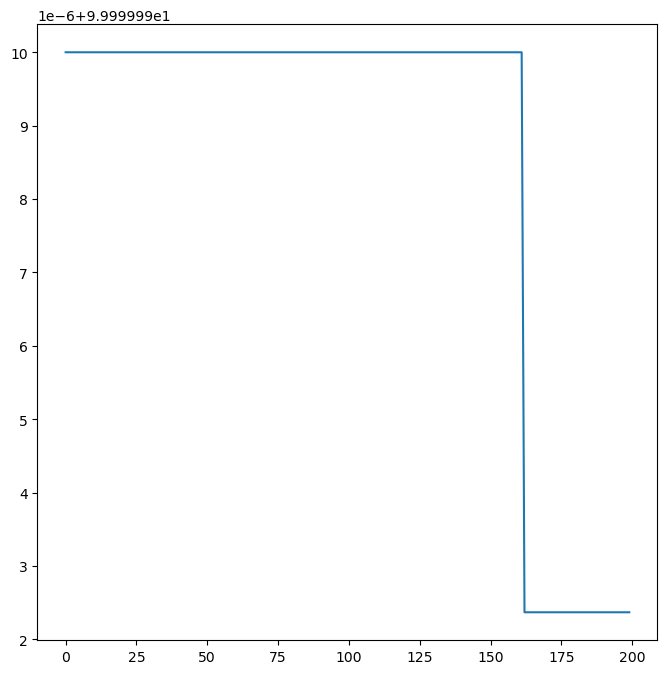

In [7]:
plt.figure(figsize=(8,8))
plt.plot(u.data[:,49,49], label='center')
plt.show()